In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Number of rows: 10


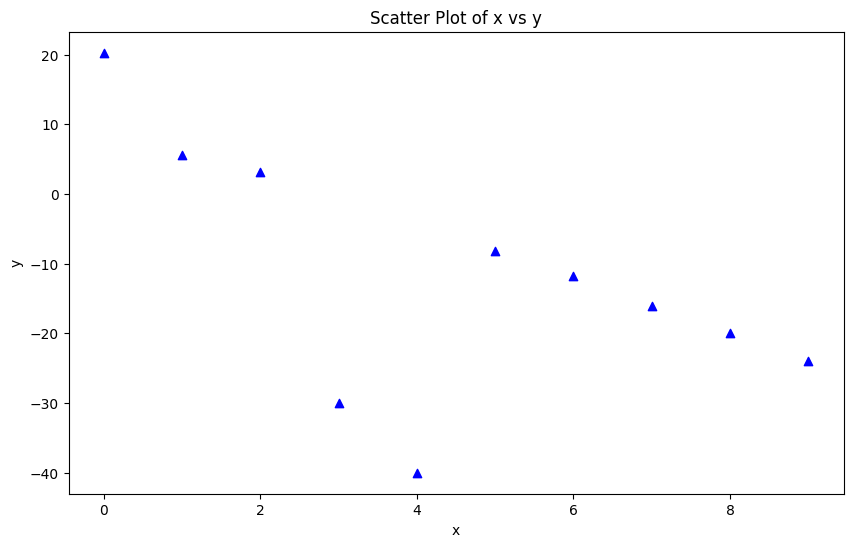

In [2]:
data = pd.read_excel('q1.xlsx')

x = data['x']
y = data['y']

x_train = np.array(x)
y_train = np.array(y)

print(f"Number of rows: {len(x)}")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c='blue', marker='^')
plt.xlabel('x')
plt.ylabel('y')

plt.title('Scatter Plot of x vs y')
plt.show()

# Implementing a linear regression model

### cost function

In [3]:
def compute_cost(x,y,w,b):
    m = len(x)
    cost = 0
    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        cost += (f_wb - y[i]) ** 2
    cost /= (2 * m)
    return cost

### gradient function

In [4]:
def compute_gradient(x,y,w,b):
    m = len(x)
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        error = f_wb - y[i]
        dj_dw += error * x[i]
        dj_db += error
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

### gradient descent function

In [5]:
import copy


def compute_gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha , num_iteration):
    m = len(x)

    cost_history = np.zeros(num_iteration)
    w_history = np.zeros(num_iteration)
    b_history = np.zeros(num_iteration)

    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iteration):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        cost = cost_function(x, y, w, b)
        cost_history[i] = cost
        w_history[i] = w
        b_history[i] = b

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}, w {w}, b {b}")

    return w, b, cost_history, w_history, b_history

### Running the gradient descent algorithm

In [6]:
initial_w = 0.
initial_b = 0.

iterations = 15000
alpha = 0.0684


w, b, J_history, w_history, b_history = compute_gradient_descent(
    x_train, y_train, initial_w, initial_b,
    compute_cost, compute_gradient, alpha, iterations
)

print("w, b found by gradient descent:", w, b)

Iteration 0: Cost 218.9983967477744, w -5.728978799999999, b -0.8270244
Iteration 100: Cost 184.46144288561555, w -5.9141880594977465, b 2.915384159344713
Iteration 200: Cost 160.82551462711035, w -5.652647748216662, b 3.4936024139976682
Iteration 300: Cost 143.40533729668863, w -5.368030200496573, b 3.6153030467505936
Iteration 400: Cost 130.53912443196617, w -5.114908873478839, b 3.6665237779956454
Iteration 500: Cost 121.03583244255144, w -4.896157387838923, b 3.7029529895555724
Iteration 600: Cost 114.01646295016147, w -4.7079829414877405, b 3.7331816550914745
Iteration 700: Cost 108.83178060336115, w -4.546235119387047, b 3.759007580381163
Iteration 800: Cost 105.0022441900986, w -4.407220219683163, b 3.7811813870365474
Iteration 900: Cost 102.17365255033658, w -4.287745731971759, b 3.800235180921343
Iteration 1000: Cost 100.08438382401525, w -4.185065344192393, b 3.8166101981768263
Iteration 1100: Cost 98.54119754380949, w -4.096818420543278, b 3.8306833655038255
Iteration 1200: 

In [7]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

### Plotting the results

Text(0.5, 0, 'x')

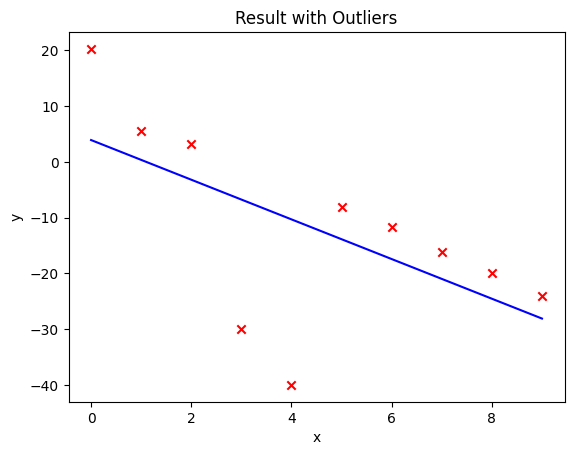

In [8]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data.
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("Result with Outliers")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')

# Question 4

In [9]:
def new_loss_function(x,y,w,b,beeta=1):
    m = len(x)
    L_theeta_beeta = 0
    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        L_theeta_beeta += ((f_wb - y[i]) ** 2)/((f_wb - y[i]) ** 2 + beeta ** 2)
    L_theeta_beeta /= (m)
    return L_theeta_beeta

In [10]:
model1_beeta_1 = new_loss_function(x, y, -4, 12, 1)
model2_beeta_1 = new_loss_function(x, y, w, b, 1)
print("Model 1 loss value:", model1_beeta_1)
print("Model 2 loss value:", model2_beeta_1)

model1_beeta_2 = new_loss_function(x, y, -4, 12, 1.0e-6)
model2_beeta_2 = new_loss_function(x, y, w, b, 1.0e-6)
print("Model 1  loss value:", model1_beeta_2)
print("Model 2  loss value:", model2_beeta_2)

model1_beeta_3 = new_loss_function(x, y, -4, 12, 1.0e+3)
model2_beeta_3 = new_loss_function(x, y, w, b, 1.0e+3)
print("Model 1 loss value:", model1_beeta_3)
print("Model 2 loss value:", model2_beeta_3)

Model 1 loss value: 0.435416262490386
Model 2 loss value: 0.9732472128402823
Model 1  loss value: 0.9999999998258206
Model 2  loss value: 0.9999999999999721
Model 1 loss value: 0.0002268287498440988
Model 2 loss value: 0.0001882460444591167


In [11]:
initial_w = 0.
initial_b = 0.

iterations = 15000
alpha_ = 0.068


w_, b_, J_history_, w_history_, b_history_ = compute_gradient_descent(
    x_train, y_train, initial_w, initial_b,
   new_loss_function, compute_gradient, alpha_, iterations
)

print("w, b found by gradient descent:", w, b)

Iteration 0: Cost 0.996786116015058, w -5.695476, b -0.822188
Iteration 100: Cost 0.9909489057533717, w -4.206108754587101, b 3.1804619760585924
Iteration 200: Cost 0.982053241837022, w -3.740967563327312, b 3.796383724686479
Iteration 300: Cost 0.9762874860178075, w -3.60762291587643, b 3.8955971908527056
Iteration 400: Cost 0.9741227876519604, w -3.570850655604314, b 3.9126769805299895
Iteration 500: Cost 0.9734845710668493, w -3.5609033034561888, b 3.9158770720896148
Iteration 600: Cost 0.973310459981964, w -3.558239123130962, b 3.9165341333666914
Iteration 700: Cost 0.9732639875745536, w -3.5575293413170788, b 3.9166807343833843
Iteration 800: Cost 0.9732516564202248, w -3.557340778589649, b 3.916715612367691
Iteration 900: Cost 0.9732483895590424, w -3.55729076095277, b 3.9167242805677334
Iteration 1000: Cost 0.9732475244376111, w -3.557277504379719, b 3.916726494173841
Iteration 1100: Cost 0.9732472953636109, w -3.5572739924599555, b 3.916727068555332
Iteration 1200: Cost 0.97324

## Question 2

In [12]:
data = pd.read_excel('q2.xlsx')

y = data['y']
yhat = data['yhat']

y.shape

(13,)

### calculate MSE

In [13]:
def MSE(y, yhat):
    m = len(y)
    mse = np.sum((y - yhat) ** 2) / m
    return mse

### calculate BCE

In [14]:
def BCE(y, yhat, epsilon=1e-15):
    m = len(y)
    y_pred = np.clip(yhat, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return bce

In [15]:
import pandas as pd
import numpy as np


data = pd.read_excel('q2.xlsx')

y = data['y']
yhat = data['yhat']

# Calculate per-sample MSE values
data['mse'] = (y - yhat) ** 2

# Calculate per-sample BCE values (
epsilon = 1e-15
yhat_clipped = np.clip(yhat, epsilon, 1 - epsilon)
data['bce'] = -(y * np.log(yhat_clipped) + (1 - y) * np.log(1 - yhat_clipped))

overall_mse = np.mean((y - yhat) ** 2)
overall_bce = -np.mean(y * np.log(yhat_clipped) + (1 - y) * np.log(1 - yhat_clipped))

print(f"Overall MSE: {overall_mse}")
print(f"Overall BCE: {overall_bce}")

# Save back to Excel
data.to_excel('q2.xlsx', index=False)

Overall MSE: 0.4402019230769231
Overall BCE: 1.6015890909965431


## Question 3

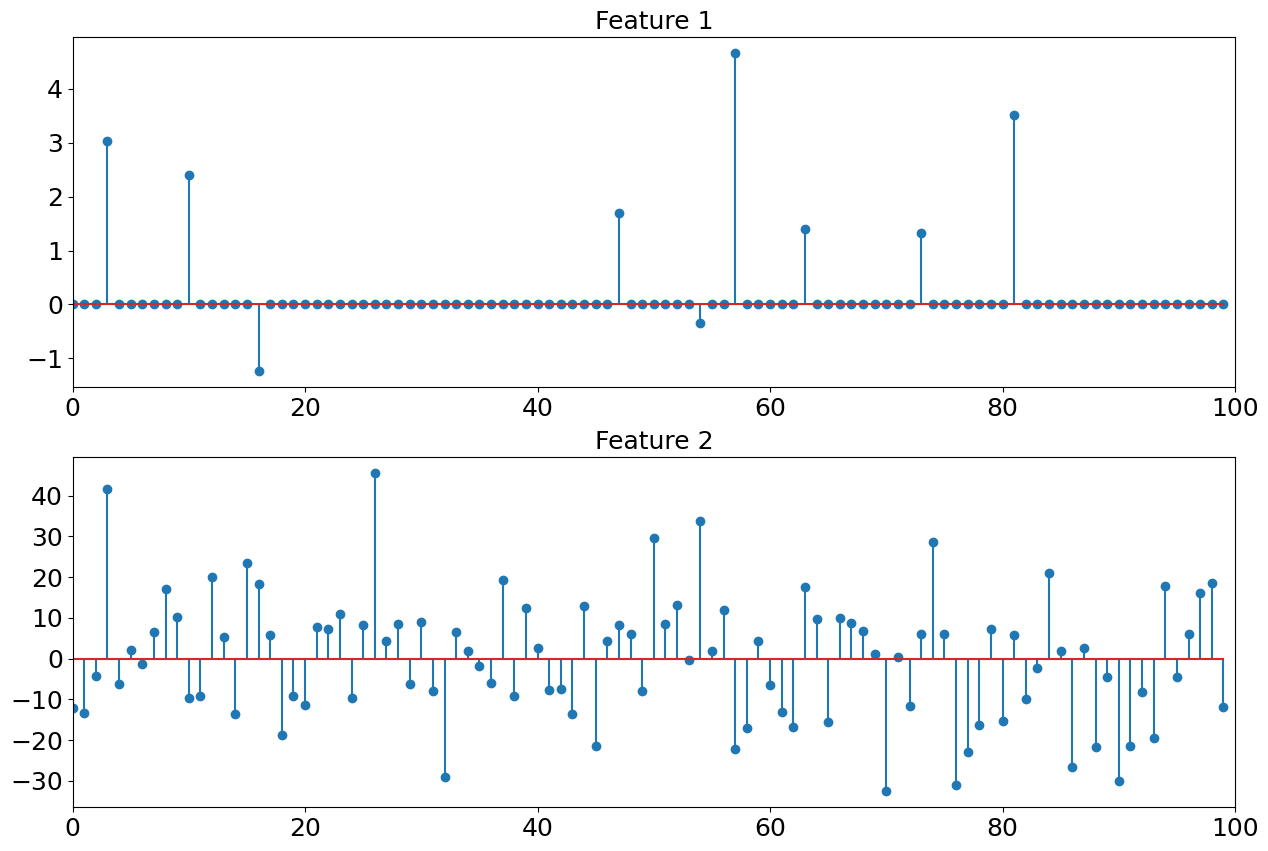

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10     # Number of non-zero elements in the signal
your_index_no = 220481
sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10) * 2 + 10
if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30
sparse_signal = sparse_signal / 5
epsilon = np.random.normal(0, 15, signal_length)

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(sparse_signal)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

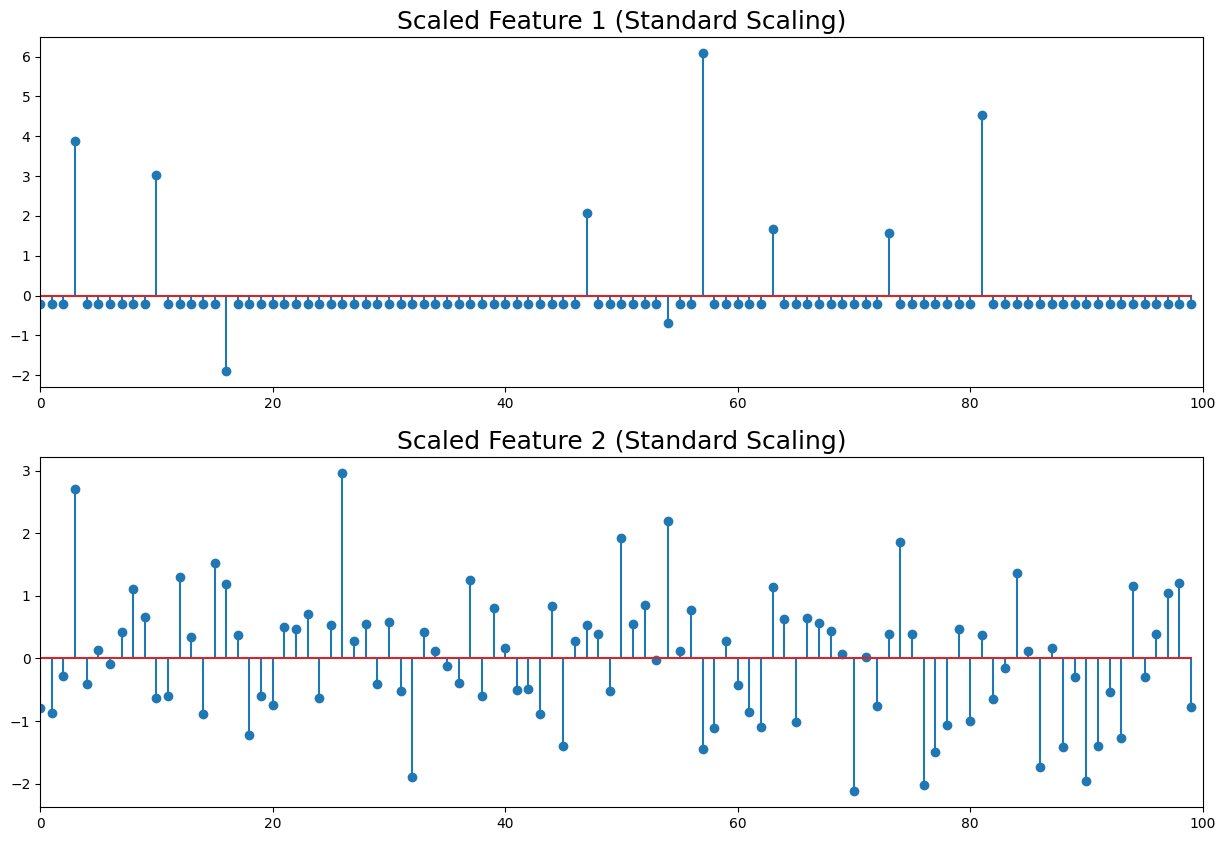

In [17]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

# Reshape for scikit-learn (2D array expected)
sparse_signal_reshaped = sparse_signal.reshape(-1, 1)
epsilon_reshaped = epsilon.reshape(-1, 1)

# Apply standard scaling
scaled_feature1 = scaler.fit_transform(sparse_signal_reshaped).flatten()
scaled_feature2 = scaler.fit_transform(epsilon_reshaped).flatten()

# Plot scaled features
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Scaled Feature 1 (Standard Scaling)", fontsize=18)
plt.stem(scaled_feature1)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Scaled Feature 2 (Standard Scaling)", fontsize=18)
plt.stem(scaled_feature2)
plt.show()

### Min-Max Scaling

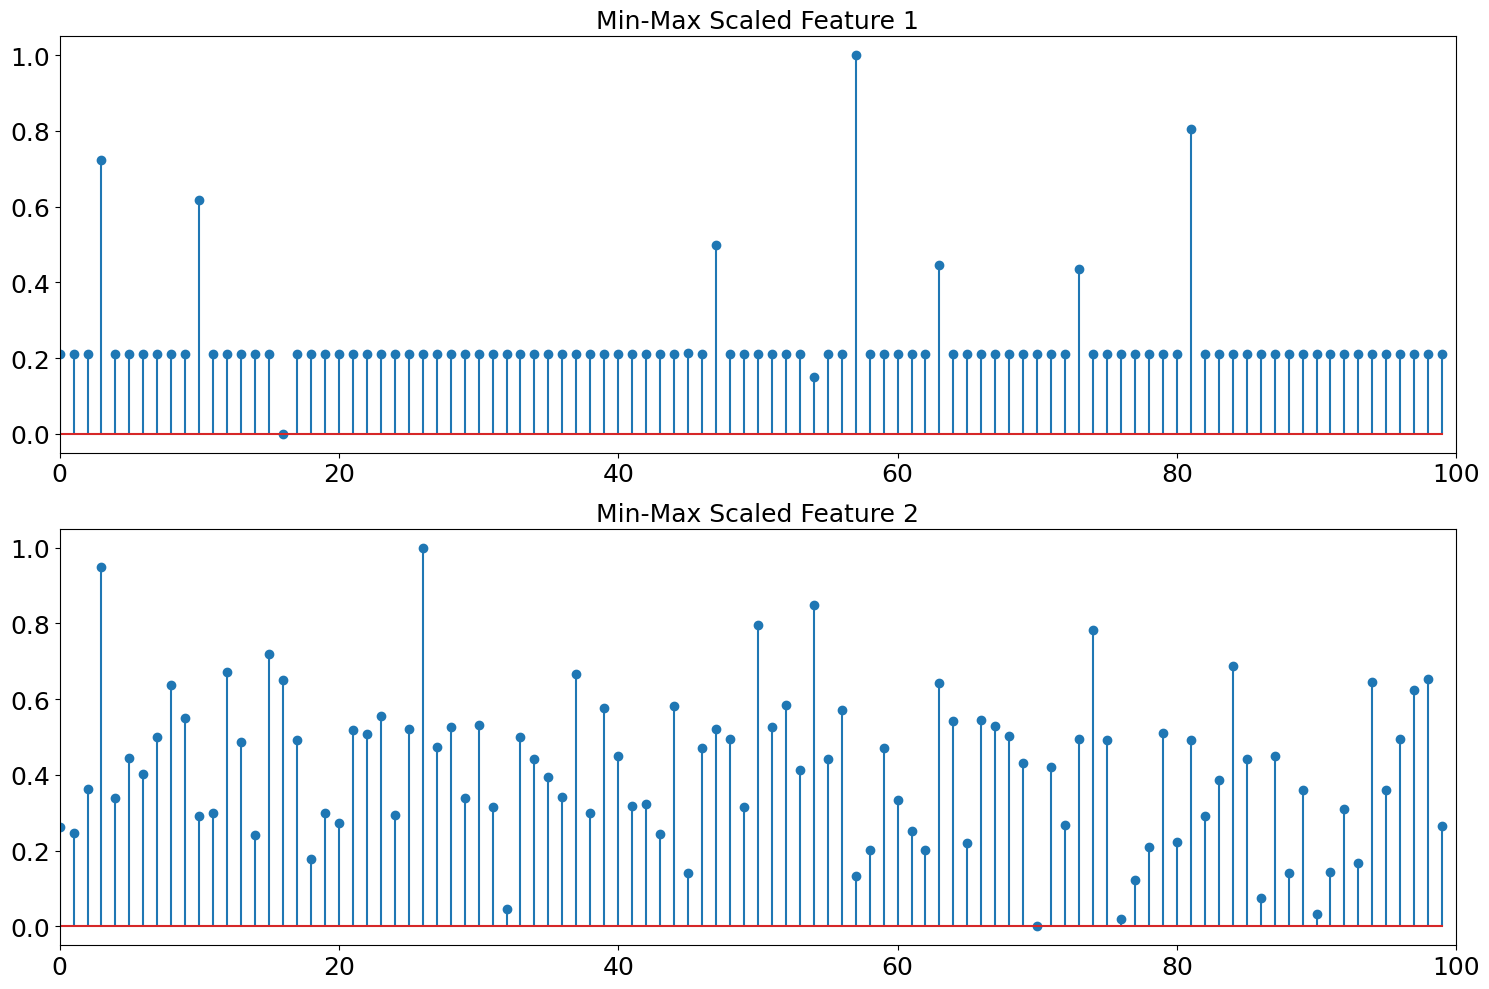

In [18]:
from sklearn.preprocessing import MinMaxScaler

# --- Min-Max Scaling ---
minmax_scaler = MinMaxScaler()

# Reshape for scikit-learn (2D array expected)
sparse_signal_reshaped = sparse_signal.reshape(-1, 1)
epsilon_reshaped = epsilon.reshape(-1, 1)

# Apply min-max scaling
minmax_scaled_feature1 = minmax_scaler.fit_transform(sparse_signal_reshaped).flatten()
minmax_scaled_feature2 = minmax_scaler.fit_transform(epsilon_reshaped).flatten()

# Plot min-max scaled features
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Min-Max Scaled Feature 1", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(minmax_scaled_feature1)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Min-Max Scaled Feature 2", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(minmax_scaled_feature2)
plt.tight_layout()
plt.savefig('minmax_scaled_features.png')
plt.show()

### Max-Abs Scaling

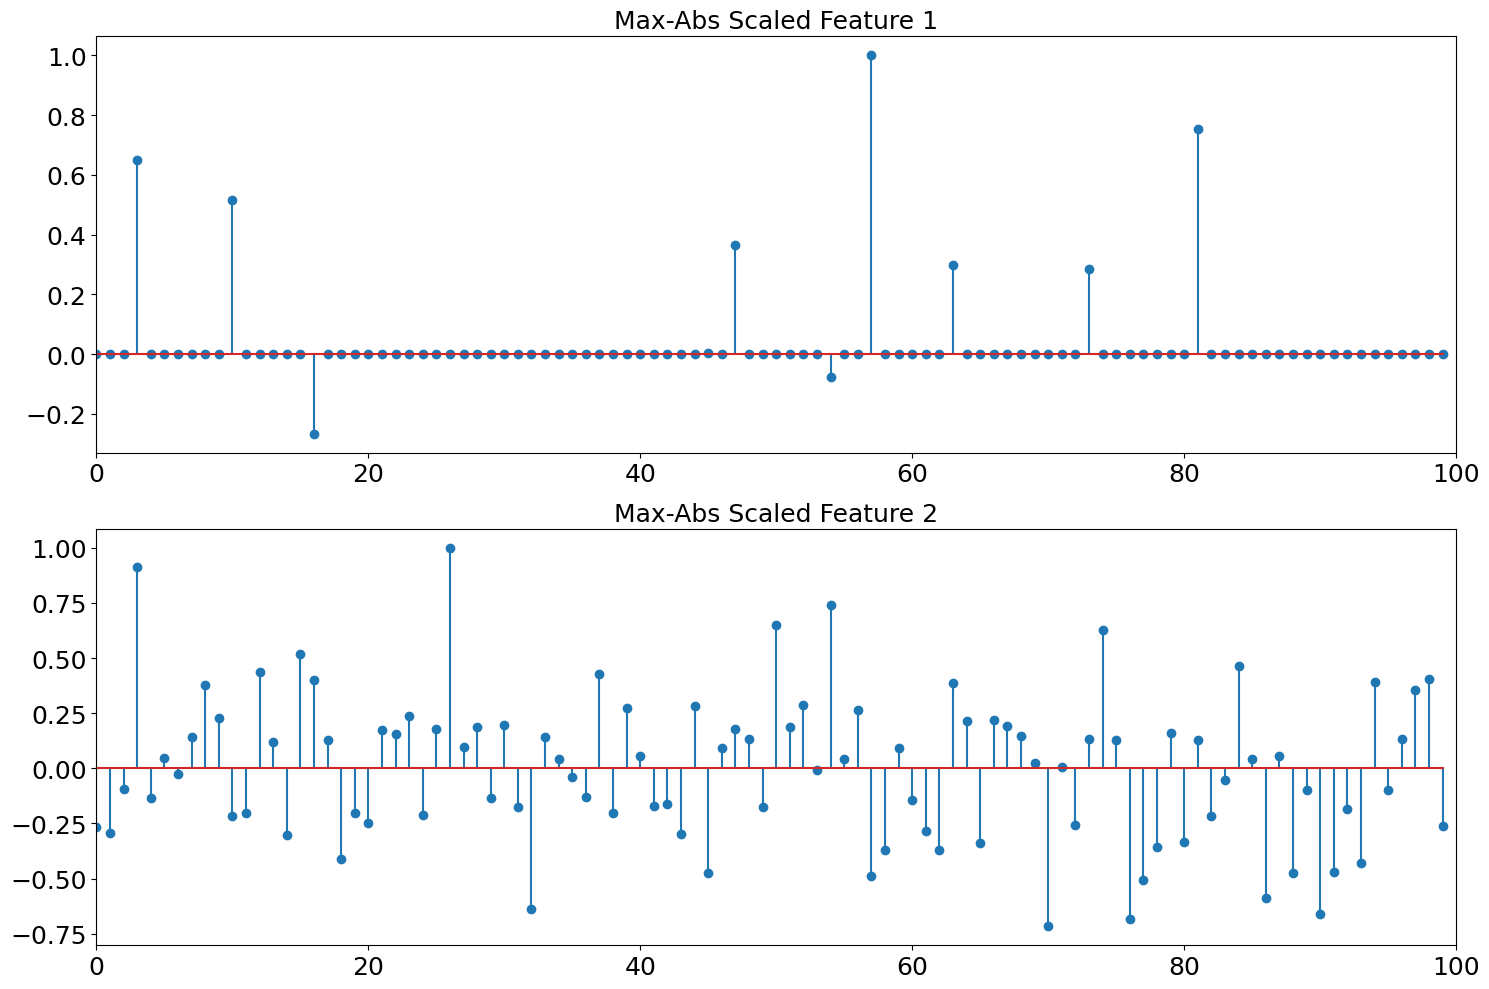

In [19]:
from sklearn.preprocessing import MaxAbsScaler

# --- Max-Abs Scaling ---
maxabs_scaler = MaxAbsScaler()

# Apply max-abs scaling
maxabs_scaled_feature1 = maxabs_scaler.fit_transform(sparse_signal_reshaped).flatten()
maxabs_scaled_feature2 = maxabs_scaler.fit_transform(epsilon_reshaped).flatten()

# Plot max-abs scaled features
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Max-Abs Scaled Feature 1", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(maxabs_scaled_feature1)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Max-Abs Scaled Feature 2", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(maxabs_scaled_feature2)
plt.tight_layout()
plt.savefig('maxabs_scaled_features.png')
plt.show()